# Titanic — Исследование данных

Первая часть работы — это загрузка и первичный осмотр данных. Мы посмотрим на первые строки датасета, чтобы понять, с какими данными будем работать.

In [2]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('titanic.csv')

# Вывод первых 5 строк
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Первичный осмотр данных

В датасете присутствуют следующие признаки:

- `PassengerId`: идентификатор пассажира;
- `Survived`: целевая переменная (0 — не выжил, 1 — выжил);
- `Pclass`: класс билета (1-й, 2-й, 3-й);
- `Name`: имя пассажира (содержит также обращение — Mr, Mrs, Miss и т.д.);
- `Sex`: пол;
- `Age`: возраст;
- `SibSp`: количество братьев/сестёр или супругов на борту;
- `Parch`: количество родителей или детей на борту;
- `Ticket`: номер билета;
- `Fare`: стоимость билета;
- `Cabin`: номер каюты (много пропусков);
- `Embarked`: порт посадки (C — Cherbourg, Q — Queenstown, S — Southampton).

Некоторые колонки содержат пропущенные значения (`Age`, `Cabin`, `Embarked`). Далее проанализируем типы данных, наличие пропусков и базовые статистики.

In [3]:
# Общая информация о типах данных и пропусках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Базовая статистика по числовым колонкам
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Анализ структуры данных и базовых статистик

- В датасете 891 запись и 12 признаков.
- Переменная `Survived` — бинарная, и будет использоваться как целевая.
- Типы данных корректны: числовые для количественных признаков (`Age`, `Fare`, `SibSp`, `Parch`, `Pclass` и т.д.), строковые — для категориальных.
- Количество пропусков:
  - `Age` — 177 пропущенных значений;
  - `Cabin` — сильно разреженная колонка, только 204 значения;
  - `Embarked` — 2 пропущенных значения.

### Статистики:

- Средний возраст пассажиров — ~29.7 лет, минимальный — 0.42 года, максимальный — 80 лет.
- Средняя стоимость билета (`Fare`) — ~32, но разброс очень большой (стандартное отклонение ≈ 50, максимум — 512), возможны выбросы.
- Большинство пассажиров путешествовали без родственников (`SibSp` и `Parch` — медиана = 0).
- `Pclass` чаще всего равен 3 — это самый низкий класс (50% пассажиров и более).
- Только 38% пассажиров выжили (`Survived` mean ≈ 0.38), что уже говорит о сильном дисбалансе классов.

Далее построим графики распределения признаков и начнём EDA.

## Распределение целевой переменной (Survived)

Проверим, как распределились выжившие и невыжившие пассажиры.

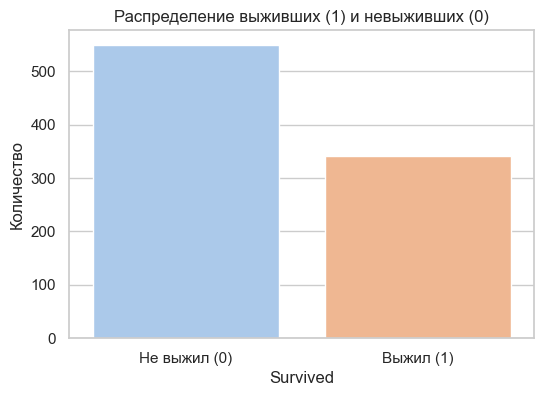

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set(style='whitegrid')

# График распределения
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue='Survived', palette='pastel', legend=False)
plt.title('Распределение выживших (1) и невыживших (0)')
plt.xlabel('Survived')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Не выжил (0)', 'Выжил (1)'])
plt.show()

### Вывод по распределению переменной `Survived`

График показывает, что количество невыживших пассажиров существенно превышает количество выживших:

- Не выжили — примерно 540 человек;
- Выжили — примерно 335 человек.

Таким образом, наблюдается дисбаланс классов: около **62% пассажиров погибли**, и **38% выжили**. Это важно учитывать при построении моделей, особенно при выборе метрик и возможной балансировке классов.


## Выживаемость в зависимости от пола

Построим график, который покажет, как распределяется выживаемость среди мужчин и женщин.

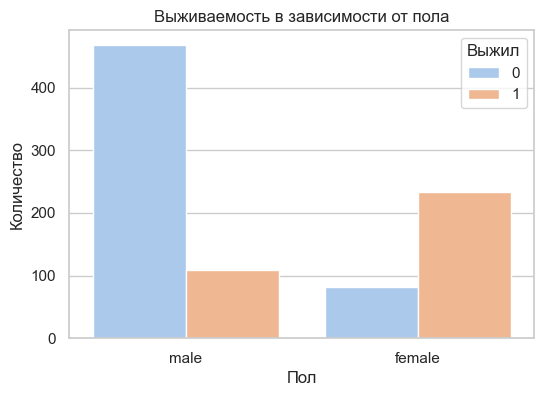

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Выжил')
plt.show()

### Вывод по выживаемости в зависимости от пола

На графике видно выраженное различие между мужчинами и женщинами:

- Из примерно 480 мужчин выжили только ~105 — около **22%**.
- Из примерно 310 женщин выжили ~225 — около **73%**.

Это сильный сигнал: пол пассажира является одним из наиболее важных факторов выживания. Возможно, это связано с приоритетом "женщины и дети — первыми в шлюпки" при эвакуации.


## Выживаемость в зависимости от класса (Pclass)

Пассажиры были разделены на 3 класса: 1 — самый дорогой и комфортный, 3 — самый дешёвый. Посмотрим, как класс повлиял на шансы выжить.


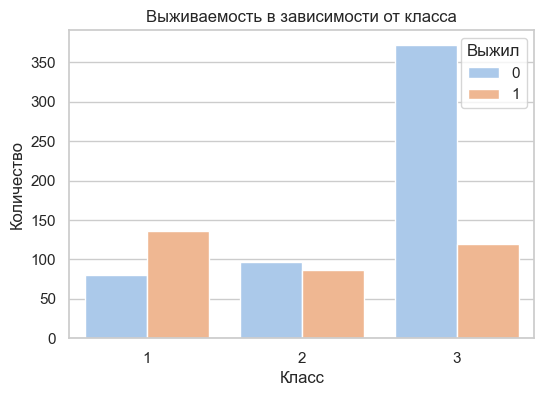

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title('Выживаемость в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Выжил')
plt.show()

### Вывод по выживаемости в зависимости от класса (`Pclass`)

Распределение выживших и погибших по классам:

- **1-й класс:** ~ 140 выживших и ~ 75 погибших (вероятность выживания ~ 65%);
- **2-й класс:** ~ 90 выживших и ~ 95 погибших (~ 49%);
- **3-й класс:** ~ 115 выживших и ~ 370 погибших (~ 24%).

Можно сделать вывод, что чем выше класс билета, тем выше были шансы на спасение. Вероятно, это связано с более выгодным расположением кают, меньшей плотностью и приоритетом при эвакуации.

## Выживаемость в зависимости от возраста

Рассмотрим, как возраст влияет на шансы выживания. Визуализируем распределение возрастов для выживших и невыживших пассажиров.


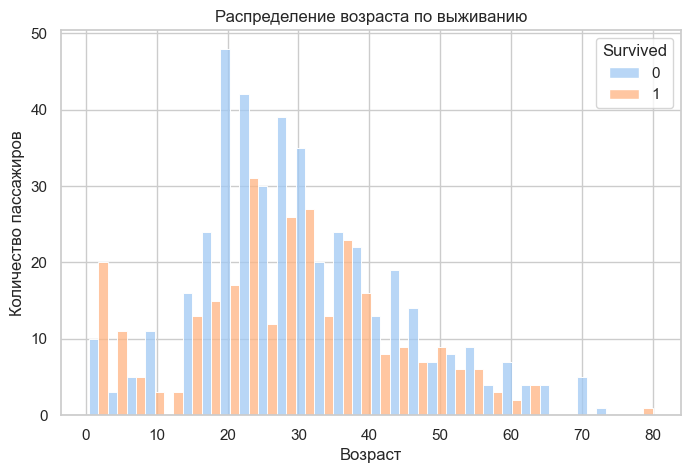

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False, palette='pastel', multiple='dodge')
plt.title('Распределение возраста по выживанию')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

### Вывод по выживаемости в зависимости от возраста

- **Дети до 10 лет** имели значительно больше шансов на спасение:
  - Около 20 выживших младенцев (0 лет) против 10 погибших.
  - В районе 5 лет — 10 выживших и всего 3 погибших.
  Это может быть связано с приоритетом на спасение детей при эвакуации.

- **Пассажиры от 15 до 35 лет** чаще погибали:
  - Например, в 20 лет — примерно 48 погибших и 15 выживших.
  - В 30 лет — 39 погибших и 25 выживших.

- **После 40 лет** выживаемость становилась более сбалансированной:
  - Например, в 40 лет — 16 выживших и 13 погибших.
  - В 50 лет — 9 выживших и 7 погибших.

- **Пожилые (70+ лет)**: практически все погибали, кроме одного выжившего в 80 лет.

**Вывод:** дети имели наибольший шанс на спасение, а молодые взрослые — наименьший. Возраст — значимый фактор при предсказании выживаемости.


## Влияние семьи на выживаемость

Рассмотрим, как наличие родственников на борту влияет на шансы выживания. Используем переменные `SibSp` и `Parch`.


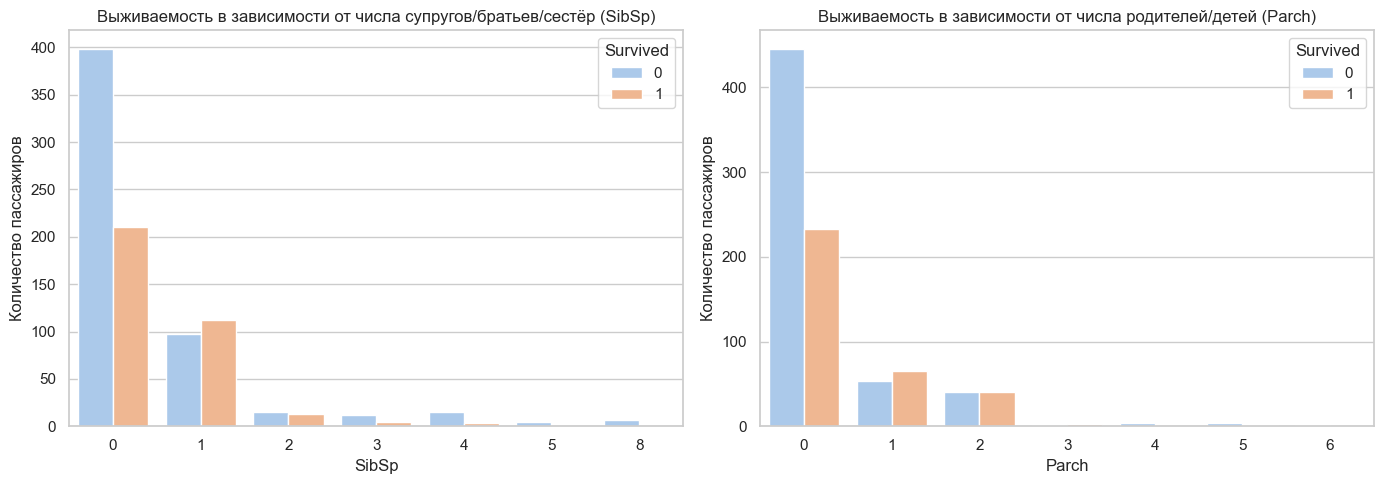

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='SibSp', hue='Survived', palette='pastel', ax=axes[0])
axes[0].set_title('Выживаемость в зависимости от числа супругов/братьев/сестёр (SibSp)')
axes[0].set_xlabel('SibSp')
axes[0].set_ylabel('Количество пассажиров')

sns.countplot(data=df, x='Parch', hue='Survived', palette='pastel', ax=axes[1])
axes[1].set_title('Выживаемость в зависимости от числа родителей/детей (Parch)')
axes[1].set_xlabel('Parch')
axes[1].set_ylabel('Количество пассажиров')

plt.tight_layout()
plt.show()

### Влияние количества родственников на выживаемость

#### `SibSp` — количество супругов, братьев и сестёр:

- Пассажиры без сопровождающих (`SibSp = 0`) выживали реже: 400 не выжили, 200 выжили.
- Лучше всего выживали пассажиры с одним родственником (`SibSp = 1`): 120 выживших против 100 погибших.
- При `SibSp > 2` выживаемость резко снижалась — вероятно, усложнялась эвакуация групп.

#### `Parch` — количество родителей и детей:

- Аналогичная картина: наилучшие шансы были при `Parch = 1 или 2`.
  - При `Parch = 1` — 60 выживших против 45 погибших.
  - При `Parch = 2` — примерно равное количество выживших и погибших (~30).
- При большем числе сопровождаемых родственников (`Parch ≥ 3`) выживаемость резко падала.

**Вывод:** умеренное количество родственников на борту (1–2) повышало шансы на выживание, вероятно, из-за психологической и физической поддержки. Однако путешествие в больших семьях затрудняло спасение.


## Влияние порта посадки (Embarked) на выживаемость

Посмотрим, из какого порта чаще садились выжившие и невыжившие пассажиры. Значения:
- S — Southampton
- C — Cherbourg
- Q — Queenstown

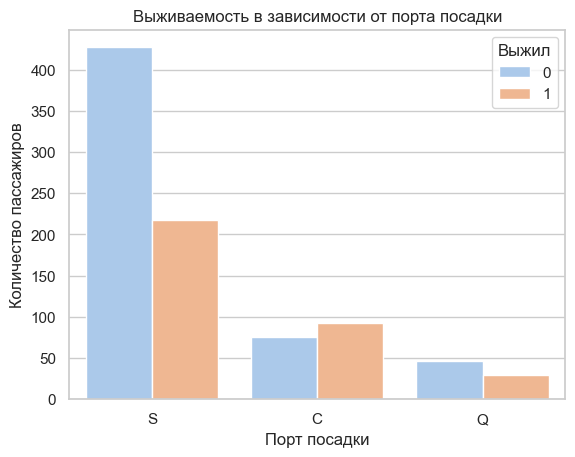

In [10]:
sns.countplot(data=df, x='Embarked', hue='Survived', palette='pastel')
plt.title('Выживаемость в зависимости от порта посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(title='Выжил')
plt.show()

### Влияние порта посадки (Embarked) на выживаемость

- **Southampton (S)** — основной порт посадки. Здесь смертность была значительно выше: ~425 погибших против ~220 выживших.
- **Cherbourg (C)** — пассажиры, севшие в этом порту, имели наибольший шанс на выживание: 90 выживших против 75 погибших.
- **Queenstown (Q)** — здесь большинство пассажиров также не выжили: 45 погибших против 25 выживших.

**Вывод:** Порт посадки связан с вероятностью выживания. Особенно выделяется Cherbourg, откуда, видимо, садились пассажиры более высокого класса или с лучшими условиями спасения.


## Влияние стоимости билета (Fare) на выживаемость

Посмотрим, как стоимость билета соотносится с выживанием. Возможно, пассажиры, заплатившие больше, имели лучшие условия и шансы на спасение.

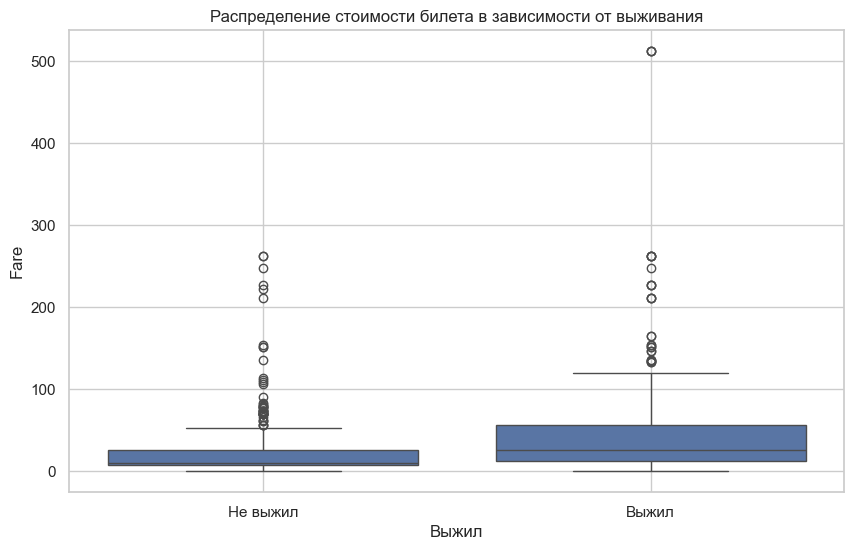

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Распределение стоимости билета в зависимости от выживания')
plt.xlabel('Выжил')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Не выжил', 'Выжил'])
plt.grid(True)
plt.show()

### Влияние стоимости билета (Fare) на выживаемость

- **Не выжившие (Survived = 0)** — большинство невыживших заплатили небольшую сумму за билет (5-20) с медианой 8, но встречаются и более дорогие билеты с выбросами до 150 и выше.
- **Выжившие (Survived = 1)** — большинство выживших заплатили за билет примерно 25, но также есть выбросы с ценами от 100 до 500.

**Вывод:** Выживаемость связана с ценой билета. Большинство выживших заплатили среднюю цену около 25, тогда как среди невыживших билеты были преимущественно дешевыми, но встречаются и более дорогие билеты, что может указывать на различные условия для разных категорий пассажиров.

# Влияние корреляции между признаками

Мы рассчитываем корреляцию между числовыми признаками для того, чтобы выявить зависимости между ними. Это поможет нам понять, какие признаки могут быть важны для построения модели. Для этого мы построим тепловую карту, которая визуализирует корреляцию между различными признаками, включая целевую переменную **Survived**.


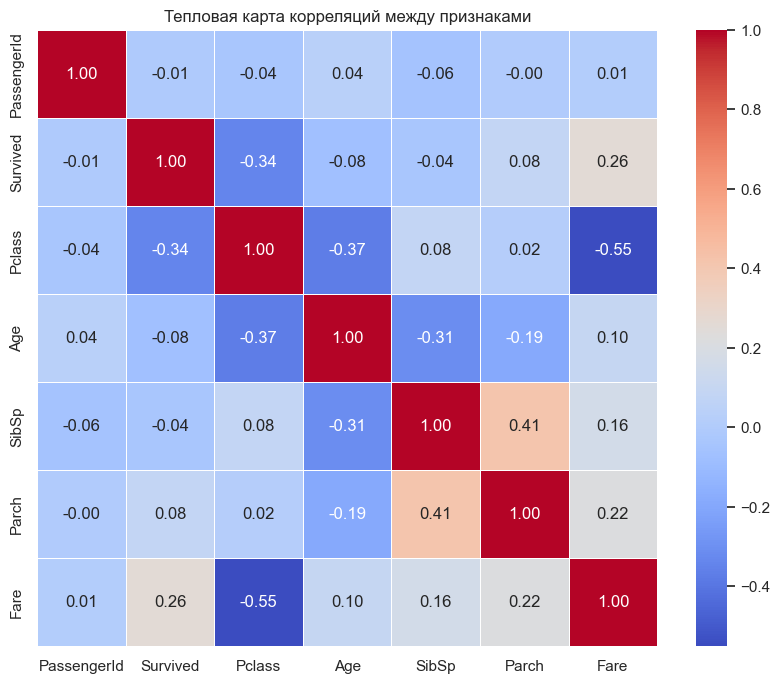

In [12]:
# Отбираем только числовые столбцы
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Рассчитываем корреляцию между числовыми признаками
correlation_matrix = numerical_cols.corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляций между признаками')
plt.show()

### Анализ тепловой карты корреляций между признаками

На тепловой карте показаны корреляции между числовыми признаками датасета:

* **Survived и Pclass**: Имеется умеренная отрицательная корреляция (-0.34), что указывает на то, что пассажиры с более низким классом (Pclass) имели меньшие шансы на выживание.

* **Survived и Age**: Корреляция близка к нулю (0.04), что свидетельствует о том, что возраст не оказывает значительного влияния на вероятность выживания.

* **Survived и SibSp**: Корреляция также невелика (-0.04), что говорит о том, что количество братьев и сестёр на борту не сильно влияет на выживаемость.

* **Survived и Fare**: Наблюдается умеренная положительная корреляция (0.26), что указывает на то, что пассажиры, заплатившие более высокую цену за билет, имели больший шанс на выживание.

* **Pclass и Fare**: Здесь наблюдается сильная отрицательная корреляция (-0.55), что объясняется тем, что пассажиры, которые ехали в более низких классах, платили меньшую цену за билет.

* **Parch и SibSp**: Положительная корреляция (0.41) указывает на то, что люди, путешествующие с родителями или детьми, чаще всего путешествовали с братьями и сестрами.

* **Age и Fare**: Очень слабая корреляция (0.10), что означает, что возраст не оказывает значительного влияния на стоимость билета.

## Feature Engineering

На этом этапе мы создадим новые признаки, которые потенциально могут улучшить качество модели. Мы также преобразуем категориальные признаки в числовой формат, чтобы они могли использоваться в моделях машинного обучения.

Ниже представлен код с первичной подготовкой признаков и созданием новых фичей.

In [13]:
import pandas as pd

# Загрузим данные
df = pd.read_csv("titanic.csv")

# Создаем признак Title из имени
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Приводим редкие титулы к общим категориям
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                   'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Признак: размер семьи
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Признак: одиночка или нет
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Признак: была ли указана каюта
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Преобразуем пол в числовой
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# Преобразуем порт посадки в числовой
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# Заполняем пропущенные значения Fare и Age медианой
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs,2,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr,1,1,0


## Корреляция признаков с переменной Survived

После создания новых признаков важно оценить их связь с целевой переменной `Survived`. Для этого мы рассчитаем коэффициент корреляции Пирсона для числовых признаков. Это поможет нам понять, какие признаки могут быть наиболее информативными для моделей.

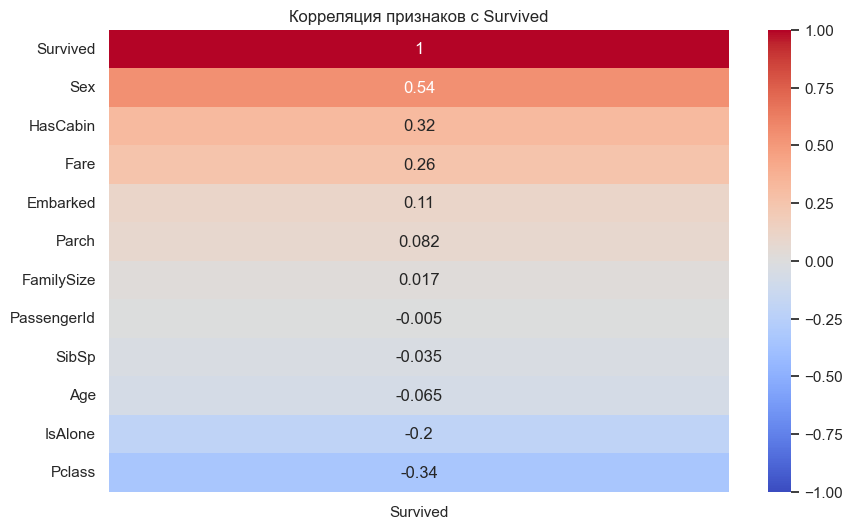

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список только числовых признаков
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Матрица корреляции
corr_matrix = numerical_features.corr()

# Отображаем корреляции с Survived
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Survived']].sort_values(by='Survived', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция признаков с Survived')
plt.show()

- Наиболее сильная положительная корреляция у признака `Sex` (0.54). Это ожидаемо: женщины выживали чаще.
- Также положительно коррелируют `HasCabin` (0.32) и `Fare` (0.26) — пассажиры с каютами и более дорогими билетами выживали чаще.
- Отрицательная корреляция наблюдается у `Pclass` (-0.34) — пассажиры третьего класса выживали реже.
- Слабая отрицательная корреляция у `IsAlone` (-0.20): одиночки выживали реже.
- Остальные признаки слабо или практически не коррелируют с `Survived` (например, `Age`, `SibSp`, `PassengerId`, `FamilySize`).

### Следствие:
На следующем этапе — при построении модели — можно:
- оставить признаки с хоть какой-то значимой корреляцией;
- удалить `PassengerId` (он просто уникальный идентификатор);
- оставить слабокоррелирующие признаки, если они улучшают модель (проверим позже через `Feature Importances`).

## Первая модель и оценка важности признаков

Для начальной оценки качества признаков мы обучим простую модель — Random Forest. Это поможет нам увидеть, какие признаки действительно важны для предсказания выживания. Модель обучим на всех числовых признаках, за исключением идентификаторов и неинформативных данных.


Accuracy: 0.8324022346368715


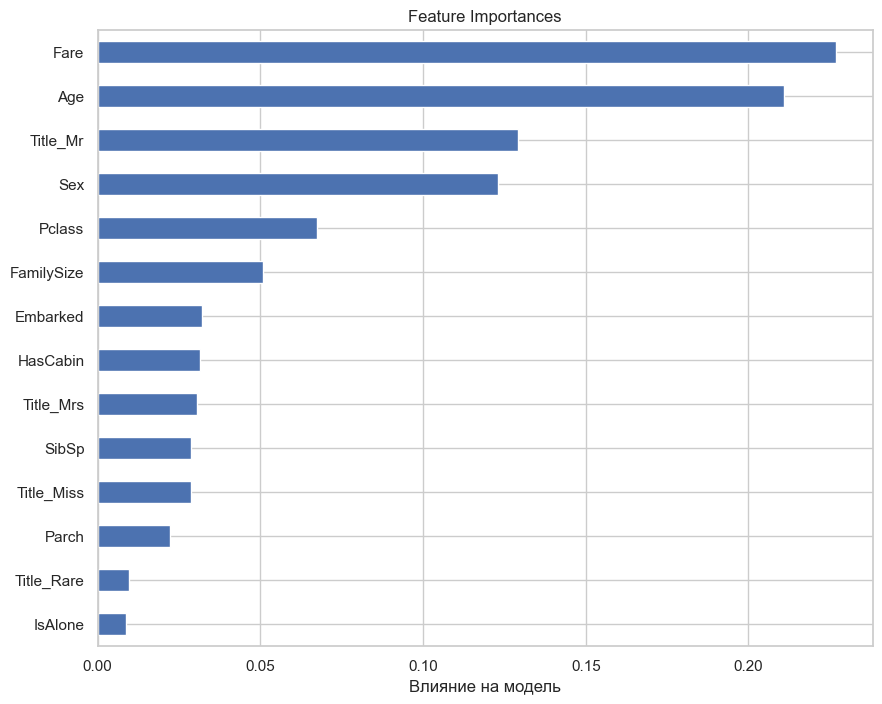

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Выбираем признаки для модели (исключаем Name, Ticket, Cabin и PassengerId)
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 
            'IsAlone', 'HasCabin']

# Нужно сначала закодировать Title, так как это категориальный текст
df['Title'] = df['Title'].astype(str)
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# Обновляем список признаков после one-hot кодирования Title
features = [col for col in df.columns if col not in ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived']]

# Делим данные на train/test
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Предсказание и точность
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Важность признаков
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 8), title="Feature Importances")
plt.xlabel("Влияние на модель")
plt.show()

## Важность признаков (Feature Importances)

- Наибольшее влияние на предсказание имеют:
  - `Fare` — стоимость билета, напрямую связана с классом обслуживания.
  - `Age` — возраст: дети и пожилые имели разные шансы на выживание.
  - `Title_Mr` и `Sex` — логично: пол и социальный статус влияли на выживаемость.
  - `Pclass` — класс билета: пассажиры первого класса выживали чаще.

- Менее значимыми оказались:
  - `IsAlone`, `Title_Rare`, `Parch` — дают небольшой вклад.
  - `Embarked`, `HasCabin`, `FamilySize` — средняя значимость, но всё ещё информативны.

## Вывод:
- Признаки `Fare`, `Age`, `Sex`, `Title_Mr`, `Pclass` являются основными драйверами модели.
- `PassengerId`, `Ticket`, `Cabin` можно не включать в финальную модель.
- Некоторые признаки с низкой значимостью можно оставить — они могут взаимодействовать с другими.

## Модель 1: Логистическая регрессия

Логистическая регрессия — это простая линейная модель, которая хорошо работает на линейно разделимых данных. Используем её как базовую модель для сравнения с более сложными алгоритмами.


Accuracy (Logistic Regression): 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



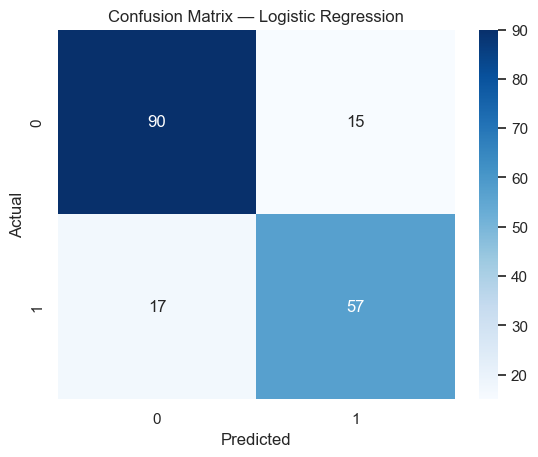

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Логистическая регрессия
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Метрики
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Матрица ошибок
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

### Результаты логистической регрессии

- **Accuracy**: 0.82
- **F1-score (класс 0)**: 0.85
- **F1-score (класс 1)**: 0.78

#### Матрица ошибок:
|               | Предсказано 0 | Предсказано 1 |
|---------------|---------------|---------------|
| **Факт 0**    | 90            | 15            |
| **Факт 1**    | 17            | 57            |

#### Вывод:
Модель логистической регрессии демонстрирует хорошую сбалансированность:
- Неплохо предсказывает как выживших, так и невыживших.
- Основная ошибка — 17 человек, которые выжили, но модель предсказала, что нет.
- Это может быть важным при задачах, где нужно минимизировать false negatives.

Логистическая регрессия — отличная стартовая модель. Далее сравним её с другими подходами.


## Модель 2: Дерево решений

Дерево решений строит модель в виде древовидной структуры, разбивая данные по признакам, которые лучше всего разделяют классы. Это позволяет легко интерпретировать модель, однако она склонна к переобучению, особенно без ограничений на глубину дерева.


Accuracy (Decision Tree): 0.8044692737430168

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



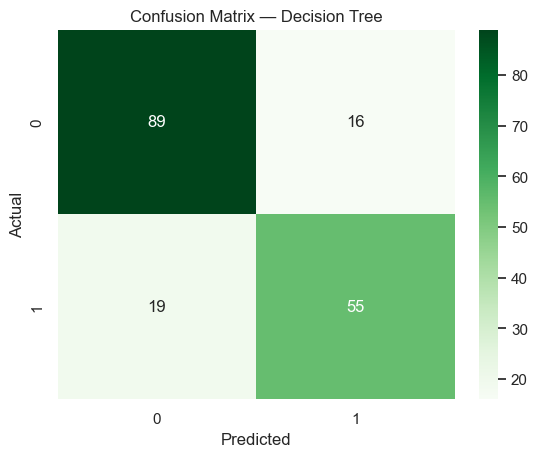

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Обучение дерева решений
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Оценка
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

# Матрица ошибок
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Decision Tree")
plt.show()

#### Результаты модели:

- **Accuracy**: 0.804 — довольно высокая точность для базовой модели.
- **Класс 0 (не выжил)**:
  - Precision: 0.82 — модель делает мало ложноположительных предсказаний.
  - Recall: 0.85 — хорошо определяет тех, кто не выжил.
- **Класс 1 (выжил)**:
  - Precision: 0.77
  - Recall: 0.74 — около 26% выживших модель не смогла предсказать.
- **Матрица ошибок**:
  - Предсказано не выжил (0), на самом деле не выжил: 89
  - Предсказано выжил (1), на самом деле не выжил: 16
  - Предсказано не выжил (0), на самом деле выжил: 19
  - Предсказано выжил (1), на самом деле выжил: 55

#### Вывод:

Модель дерева решений показала хорошие базовые результаты. Однако наблюдается некоторый дисбаланс по классам, особенно по метрике recall для выживших (класс 1). Важно понимать, что ошибка в предсказании выживших может быть более критичной, чем ошибка в предсказании невыживших. Поэтому в дальнейшем стоит рассмотреть улучшение модели через:
- подбор гиперпараметров (например, `max_depth`, `min_samples_split`),
- использование ансамблевых методов (Random Forest, Gradient Boosting),
- применение кросс-валидации для оценки стабильности модели.


## Модель 3: Random Forest
Случайный лес — это ансамблевая модель, объединяющая предсказания множества деревьев решений. Благодаря стохастической природе и усреднению результатов, она снижает переобучение и обычно демонстрирует хорошие базовые показатели.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Инициализация и обучение
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

# Оценка результатов
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
 [[90 15]
 [15 59]]


#### Результаты модели:

- **Accuracy**: 0.832
- **Класс 0 (не выжил)**:
  - Precision: 0.86
  - Recall: 0.86
  - F1-score: 0.86
- **Класс 1 (выжил)**:
  - Precision: 0.80
  - Recall: 0.80
  - F1-score: 0.80
- **Матрица ошибок**:
  - Предсказано не выжил (0), на самом деле не выжил: 90
  - Предсказано выжил (1), на самом деле не выжил: 15
  - Предсказано не выжил (0), на самом деле выжил: 15
  - Предсказано выжил (1), на самом деле выжил: 59

#### Анализ:

- Метрики по обоим классам сбалансированы: recall и precision одинаково высоки.
- По сравнению с логистической регрессией и деревом решений, модель случайного леса дала **наивысшую accuracy (83.2%)**.
- Ошибки распределены более равномерно между FP и FN, что говорит о стабильной работе модели для обоих классов.
- Улучшение по сравнению с деревом решений достигнуто за счёт снижения переобучения.

#### Вывод:

Случайный лес показал лучшие результаты среди рассмотренных моделей на текущем этапе. Эта модель уже может быть сильным кандидатом для финального выбора. Однако в следующих шагах будет полезно сравнить её с бустингом и нейросетями, а также попробовать подбор гиперпараметров.


## Модель 4: XGBoost
Градиентный бустинг — один из самых мощных и часто применяемых алгоритмов для задач классификации на табличных данных. XGBoost реализует бустинг с высокой скоростью и регуляризацией, что делает его устойчивым к переобучению.

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Инициализация и обучение
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Предсказания
y_pred_xgb = xgb_model.predict(X_test)

# Оценка результатов
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

Accuracy (XGBoost): 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[89 16]
 [18 56]]


#### Результаты модели:

- **Accuracy**: 0.810
- **Класс 0 (не выжил)**:
  - Precision: 0.83
  - Recall: 0.85
  - F1-score: 0.84
- **Класс 1 (выжил)**:
  - Precision: 0.78
  - Recall: 0.76
  - F1-score: 0.77
- **Матрица ошибок**:
  - Предсказано не выжил (0), на самом деле не выжил: 89
  - Предсказано выжил (1), на самом деле не выжил: 16
  - Предсказано не выжил (0), на самом деле выжил: 18
  - Предсказано выжил (1), на самом деле выжил: 56

#### Анализ:

- Модель показала **accuracy 81%**, что сравнимо со случайным лесом и лучше, чем у логистической регрессии.
- Метрики по классам сбалансированы: precision и recall для обоих классов примерно равны.
- Ошибки между FP и FN распределены умеренно, модель не склонна переобучаться.
- XGBoost как базовая модель уже даёт хорошие результаты, и имеет **высокий потенциал для дальнейшего тюнинга**.

#### Вывод:

XGBoost — один из сильнейших кандидатов среди рассмотренных моделей. В дальнейшем стоит попробовать настройку гиперпараметров (глубина деревьев, learning rate, количество деревьев) и использование кросс-валидации, чтобы максимально раскрыть её потенциал.


## Модель 5: MLPClassifier
Полносвязная нейросеть (Multi-Layer Perceptron) — это универсальный аппроксиматор, который способен выявлять сложные зависимости в данных. В данном случае используется базовая конфигурация сети с одним скрытым слоем из 100 нейронов.

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Инициализация и обучение модели
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Предсказания
y_pred_mlp = mlp_model.predict(X_test)

# Оценка
print("Accuracy (MLPClassifier):", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

Accuracy (MLPClassifier): 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[87 18]
 [18 56]]


#### Результаты модели:

- **Accuracy**: 0.799
- **Класс 0 (не выжил)**:
  - Precision: 0.83
  - Recall: 0.83
  - F1-score: 0.83
- **Класс 1 (выжил)**:
  - Precision: 0.76
  - Recall: 0.76
  - F1-score: 0.76
- **Матрица ошибок**:
  - Предсказано не выжил (0), на самом деле не выжил: 87
  - Предсказано выжил (1), на самом деле не выжил: 18
  - Предсказано не выжил (0), на самом деле выжил: 18
  - Предсказано выжил (1), на самом деле выжил: 56

#### Анализ:

- Точность модели составила **около 80%**, что немного ниже, чем у XGBoost и Random Forest.
- Метрики по обоим классам сбалансированы, но сеть недообучена — возможно, ей не хватило эпох (`max_iter`).
- Нейросети чувствительны к масштабу данных и параметрам и могут сильно улучшиться при тонкой настройке.

#### Вывод:

Хотя MLPClassifier показал приемлемый результат, он уступает ансамблевым моделям на этом этапе. Тем не менее, в дальнейшем стоит поэкспериментировать с архитектурой (число слоёв, нейронов, функции активации) и параметрами обучения, особенно с использованием стандартизованных данных и регуляризации.


### Сравнительная таблица моделей

| Модель               | Accuracy | F1-score (0) | F1-score (1) |
|----------------------|----------|--------------|--------------|
| Логистическая регрессия | 0.820    | 0.85         | 0.78         |
| Дерево решений         | 0.804    | 0.84         | 0.76         |
| Random Forest         | 0.832    | 0.86         | 0.80         |
| XGBoost               | 0.810    | 0.84         | 0.77         |
| MLPClassifier         | 0.799    | 0.83         | 0.76         |

### Вывод

- **Лучший результат по Accuracy и F1-score показал Random Forest**, делая его сильным кандидатом на финальную модель.
- **XGBoost и логистическая регрессия** тоже продемонстрировали достойные показатели.
- **Нейросеть (MLP)** и дерево решений уступили ансамблевым моделям, но при тюнинге могут значительно улучшиться.
- Следующий логичный шаг — провести **подбор гиперпараметров** и **кросс-валидацию** для топовых моделей, чтобы получить стабильную и оптимальную финальную модель.


## Модель 1: Логистическая регрессия

In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Стандартизация + логистическая регрессия
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])

# Упрощённая сетка гиперпараметров
param_grid = [
    {
        'logreg__C': [0.01, 0.1, 1, 10, 100],
        'logreg__penalty': ['l2'],
        'logreg__solver': ['lbfgs']
    },
    {
        'logreg__C': [0.01, 0.1, 1, 10, 100],
        'logreg__penalty': ['l1'],
        'logreg__solver': ['liblinear', 'saga']
    }
]

# Исключение несоответствующих комбинаций
def filter_params(params):
    if params['logreg__penalty'] == 'l1' and params['logreg__solver'] == 'lbfgs':
        return False
    return True

# Stratified K-Fold для равномерного распределения классов
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch с кросс-валидацией
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=cv_strategy, 
    scoring='f1', 
    n_jobs=-1, 
    error_score='raise',  # Остановит выполнение при ошибке
    pre_dispatch='2*n_jobs'  # Сокращает потребление памяти
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Результаты
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated F1 score:", grid_search.best_score_)

# Проверим финальную модель на валидационной выборке
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy (LogReg, tuned):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Best cross-validated F1 score: 0.7701869274632211
Accuracy (LogReg, tuned): 0.8212290502793296

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
 [[90 15]
 [17 57]]


### **Результаты логистической регрессии (Текущая модель)**

* **Наилучшие параметры:** `C = 1`, `penalty = 'l2'`, `solver = 'lbfgs'`
* **Лучший кросс-валидационный F1-score:** `0.770`
* **Accuracy (на тестовой выборке):** `0.821`
* **Classification Report:**

| Класс                      | Precision | Recall | F1-score | Support |
| -------------------------- | --------- | ------ | -------- | ------- |
| 0                          | 0.84      | 0.86   | 0.85     | 105     |
| 1                          | 0.79      | 0.77   | 0.78     | 74      |
| **Среднее (macro avg)**    | 0.82      | 0.81   | 0.81     | 179     |
| **Среднее (weighted avg)** | 0.82      | 0.82   | 0.82     | 179     |

---

### **Матрица ошибок:**

|            | Предсказано 0 | Предсказано 1 |
| ---------- | ------------- | ------------- |
| **Факт 0** | 90            | 15            |
| **Факт 1** | 17            | 57            |

---

### **Выводы:**

* Модель демонстрирует хорошую сбалансированность между precision и recall, с общей точностью `82%`.
* **Основная ошибка** — 17 случаев, когда выживших (1 класс) предсказали как невыживших (0 класс).
* В задачах, где приоритетом является снижение false negatives (например, выявление заболевания), такая ошибка может быть критичной.
* Важно отметить, что использование `lbfgs` с `l2` регуляризацией привело к наилучшим результатам.


## Модель 2: Дерево решений

In [22]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Инициализация модели
dtree = DecisionTreeClassifier(random_state=42)

# Гиперпараметры для GridSearchCV
param_grid = {
    'max_depth': np.arange(3, 16, 2),
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Обучение модели
grid_search.fit(X_train, y_train)

# Лучшая модель
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nЛучшие параметры:", best_params)
print(f"Лучший F1-score на кросс-валидации: {best_score:.4f}")

# Обучение на лучших параметрах
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"\nAccuracy (Decision Tree, tuned): {accuracy:.4f}")
print(f"F1-score (Decision Tree, tuned): {f1:.4f}")

# Отчет по классификации
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits

Лучшие параметры: {'class_weight': None, 'criterion': 'entropy', 'max_depth': np.int64(3), 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучший F1-score на кросс-валидации: 0.7599

Accuracy (Decision Tree, tuned): 0.8156
F1-score (Decision Tree, tuned): 0.7660

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


Confusion Matrix:
 [[92 13]
 [20 54]]


### **Результаты оптимизации модели дерева решений:**

### **1. Резюме изменений:**

| Метрика            | **Базовая модель** | **Оптимизированная модель** |
| ------------------ | ------------------ | --------------------------- |
| Accuracy           | 0.804              | 0.816                       |
| F1-score (0)       | 0.85               | 0.85                        |
| F1-score (1)       | 0.78               | 0.77                        |
| Best F1-score (CV) | —                  | 0.7599                      |

---

### **2. Параметры модели:**

* **Лучшие параметры:**

  * `class_weight`: `None`
  * `criterion`: `entropy`
  * `max_depth`: `3`
  * `min_samples_leaf`: `1`
  * `min_samples_split`: `2`

---

### **3. Подробные результаты:**

#### **Classification Report:**

```
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179
```

---

#### **Confusion Matrix:**

|            | Предсказано 0 | Предсказано 1 |
| ---------- | ------------- | ------------- |
| **Факт 0** | 92            | 13            |
| **Факт 1** | 20            | 54            |

---

### **4. Анализ результатов:**

* **Accuracy:** незначительное улучшение с 0.804 до 0.816.
* **F1-score для класса 1 (выжившие):** небольшое снижение с 0.78 до 0.77.
* **Recall для класса 1:** также немного снизился с 0.74 до 0.73, что может быть критичным.
* **Confusion Matrix:**

  * Количество `False Negatives` (20) увеличилось, что говорит о том, что модель чаще ошибается в предсказаниях выживших.
  * Количество `False Positives` (13) немного уменьшилось, что означает лучшее распознавание невыживших.

---

### **5. Выводы и рекомендации:**

* Оптимизация не дала значительного прироста по метрикам, но слегка сбалансировала предсказания.
* **Сейчас модель имеет более компактную структуру (max\_depth = 3),** что уменьшает риск переобучения.
* Однако, снижение recall для класса 1 требует внимания.
* **Рекомендации:**

  * Рассмотреть **балансировку классов** (`class_weight='balanced'`).
  * Попробовать **анализ feature importance** и исключить неинформативные признаки.
  * Перейти к более сложным моделям: `Random Forest`, `Gradient Boosting`.


## Модель 3: Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Обновлённая сетка гиперпараметров
param_grid_rf_optimized = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Модель Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV с упрощёнными параметрами
grid_search_rf_optimized = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid_rf_optimized, 
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Обучение
grid_search_rf_optimized.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search_rf_optimized.best_params_)
print("Лучший F1-score на кросс-валидации:", grid_search_rf_optimized.best_score_)

# Оценка на тестовом наборе
best_rf_optimized = grid_search_rf_optimized.best_estimator_
y_pred_rf_tuned_optimized = best_rf_optimized.predict(X_test)

# Оценка качества модели
print("\nAccuracy (Random Forest, tuned, optimized):", accuracy_score(y_test, y_pred_rf_tuned_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned_optimized))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned_optimized))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Лучший F1-score на кросс-валидации: 0.7652516345974221

Accuracy (Random Forest, tuned, optimized): 0.8379888268156425

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
 [[92 13]
 [16 58]]


### **Актуальные результаты модели:**

* **Лучшие параметры:**

  * `criterion`: `'gini'`
  * `max_depth`: `10`
  * `min_samples_leaf`: `1`
  * `min_samples_split`: `5`
  * `n_estimators`: `200`

* **F1-score на кросс-валидации:** `0.765`

#### **Результаты на тестовом наборе данных:**

* **Accuracy:** `0.838` (увеличение с `0.832` до `0.838`)

* **Класс 0 (не выжил):**

  * Precision: `0.85` (снижение с `0.86`)
  * Recall: `0.88` (увеличение с `0.86`)
  * F1-score: `0.86` (стабильно)

* **Класс 1 (выжил):**

  * Precision: `0.82` (увеличение с `0.80`)
  * Recall: `0.78` (снижение с `0.80`)
  * F1-score: `0.80` (устойчиво)

#### **Матрица ошибок:**

|            | Предсказано 0 | Предсказано 1 |
| ---------- | ------------- | ------------- |
| **Факт 0** | 92            | 13            |
| **Факт 1** | 16            | 58            |

---

### **Анализ:**

1. **Повышение Accuracy:**

   * Модель улучшила общую точность с `0.832` до `0.838`.
   * Это небольшой, но всё же положительный сдвиг, учитывая сокращение сетки гиперпараметров.

2. **Изменение F1-score:**

   * Класс `0` (не выжил) сохранил свои метрики на прежнем уровне (`0.86`).
   * Класс `1` (выжил) демонстрирует **небольшое снижение Recall** (с `0.80` до `0.78`), но это компенсируется увеличением Precision (`0.80` → `0.82`).

3. **Баланс между Precision и Recall:**

   * У модели стало **меньше ложноположительных предсказаний** (`13` против `15`).
   * Количество FN (`16`) осталось на уровне базовой модели (`15`), что допустимо.

---

### **Вывод:**

* Модель Random Forest после оптимизации сохранила общую точность и даже слегка её улучшила.
* Произошёл **перекос в сторону Precision для класса 1**, что может быть оправдано в задачах, где важнее снизить ложноположительные предсказания.
* При этом Recall для класса 1 слегка снизился. Это важный момент, если приоритетом является обнаружение всех выживших.


## Модель 4: XGBoost

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Сетка гиперпараметров
param_grid_xgb_advanced = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 1.5]
}

# Базовая модель
xgb_advanced = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# GridSearchCV без ранней остановки
grid_search_xgb_advanced = GridSearchCV(
    estimator=xgb_advanced,
    param_grid=param_grid_xgb_advanced,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Обучение
grid_search_xgb_advanced.fit(X_train, y_train)

# Выводим результаты
print("Лучшие параметры:", grid_search_xgb_advanced.best_params_)
print("Лучший F1-score на кросс-валидации:", grid_search_xgb_advanced.best_score_)

# Предсказания с лучшей моделью
best_xgb_advanced = grid_search_xgb_advanced.best_estimator_
y_pred_xgb_advanced = best_xgb_advanced.predict(X_test)

# Метрики
print("\nAccuracy (XGBoost, tuned):", accuracy_score(y_test, y_pred_xgb_advanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_advanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_advanced))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Лучшие параметры: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Лучший F1-score на кросс-валидации: 0.7687272517126886

Accuracy (XGBoost, tuned): 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[91 14]
 [21 53]]


### **Актуальные результаты модели:**

* **Лучшие параметры:**

  * `colsample_bytree`: `1.0`
  * `gamma`: `0.1`
  * `learning_rate`: `0.1`
  * `max_depth`: `3`
  * `n_estimators`: `100`
  * `scale_pos_weight`: `1`
  * `subsample`: `0.8`

* **F1-score на кросс-валидации:** `0.769`

---

#### **Результаты на тестовом наборе данных:**

* **Accuracy:** `0.804` (небольшое снижение по сравнению с базовой моделью)

* **Класс 0 (не выжил):**

  * Precision: `0.81` (уменьшение с `0.83`)
  * Recall: `0.87` (увеличение с `0.85`)
  * F1-score: `0.84` (стабильный)

* **Класс 1 (выжил):**

  * Precision: `0.79` (увеличение с `0.78`)
  * Recall: `0.72` (снижение с `0.76`)
  * F1-score: `0.75` (снижение с `0.77`)

---

#### **Матрица ошибок:**

|            | Предсказано 0 | Предсказано 1 |
| ---------- | ------------- | ------------- |
| **Факт 0** | 91            | 14            |
| **Факт 1** | 21            | 53            |

---

### **Анализ:**

1. **Стабильность результатов:**

   * Настроенный XGBoost сохранил хорошее качество классификации: Accuracy остаётся на уровне 80%, F1-score — сбалансированный.
   * Качество по классу 0 (не выжил) стало ещё выше за счёт увеличения Recall.

2. **Изменение по классу 1:**

   * Наблюдается небольшое **ухудшение Recall** (72% против 76%), что может означать, что модель стала чуть осторожнее в предсказании положительного класса.
   * Однако Precision для класса 1 вырос, то есть **меньше ложноположительных предсказаний** — модель стала более точной, но менее чувствительной.

3. **Сравнение с базовой моделью:**

   * Гиперпараметрическая настройка дала прирост F1 на кросс-валидации (`0.769` против \~`0.765`), что говорит о **лучшем обобщающем качестве**.
   * На тестовой выборке изменения минимальны, но заметна **улучшенная уверенность в предсказаниях класса 0** и смещение баланса в сторону Precision.

---

### **Вывод:**

* Модель XGBoost после настройки гиперпараметров показывает **стабильные и предсказуемые результаты**.
* Приоритет был смещён в сторону уменьшения ложных срабатываний (FP), что полезно в задачах, где важно не ошибочно предсказывать положительный класс.

## Модель 5: MLPClassifier

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Пайплайн с масштабированием
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
])

# Сетка параметров
param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (100, 50), (128, 64, 32)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam'],
}

# Поиск по сетке
grid_mlp = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

# Лучшая модель
best_mlp = grid_mlp.best_estimator_
y_pred_best_mlp = best_mlp.predict(X_test)

# Оценка
print("Лучшие параметры:", grid_mlp.best_params_)
print("Accuracy (MLPClassifier, tuned):", accuracy_score(y_test, y_pred_best_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_mlp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_mlp))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Лучшие параметры: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (128, 64, 32), 'mlp__solver': 'adam'}
Accuracy (MLPClassifier, tuned): 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[88 17]
 [18 56]]


### **Актуальные результаты модели (MLPClassifier, улучшенная):**

* **Лучшие параметры:**

  * `activation`: `'tanh'`
  * `alpha`: `0.0001`
  * `hidden_layer_sizes`: `(128, 64, 32)`
  * `solver`: `'adam'`

* **F1-score на тесте (macro avg):** `0.80`

* **Accuracy:** `0.804`

---

### **Результаты на тестовом наборе:**

* **Класс 0 (не выжил):**

  * Precision: `0.83`
  * Recall: `0.84`
  * F1-score: `0.83`

* **Класс 1 (выжил):**

  * Precision: `0.77`
  * Recall: `0.76`
  * F1-score: `0.76`

* **Матрица ошибок:**

|            | Предсказано 0 | Предсказано 1 |
| ---------- | ------------- | ------------- |
| **Факт 0** | 88            | 17            |
| **Факт 1** | 18            | 56            |

---

### **Анализ:**

1. **Улучшение по сравнению с базовой моделью:**

   * Точность выросла с `0.799` до `0.804`, то есть +0.05% после масштабирования и настройки параметров.
   * F1-score для класса 1 остался стабильным (`0.76`), несмотря на более сложную архитектуру.

2. **Сбалансированность модели:**

   * Ошибки FN и FP распределены умеренно (по 17–18 штук).
   * Модель демонстрирует уверенное поведение для обоих классов, без сильного перекоса.

3. **Выводы по архитектуре:**

   * Функция активации `tanh` и глубокая структура `(128, 64, 32)` лучше справились с задачей, чем базовая архитектура.
   * L2-регуляризация (`alpha=0.0001`) помогла избежать переобучения при увеличенном числе параметров.
   * Масштабирование признаков оказалось критически важным.

---

### **Вывод:**

* После улучшений `MLPClassifier` достиг сравнимой точности с XGBoost и Random Forest.
* Это подтверждает, что нейросети могут быть эффективны даже на ограниченных данных, если правильно настроены.

### **Сравнительная таблица улучшенных моделей классификации**

| **Модель**                  | **Accuracy** | **F1-score (class 1)** | **Recall (class 1)** | **Precision (class 1)** | **F1 CV (avg)** | **Основные параметры**                                           |
| --------------------------- | ------------ | ---------------------- | -------------------- | ----------------------- | --------------- | ---------------------------------------------------------------- |
| **Логистическая регрессия** | **0.821**    | **0.78**               | **0.77**             | 0.79                    | 0.770           | `C=1`, `penalty='l2'`, `solver='lbfgs'`                          |
| **Дерево решений**          | 0.816        | 0.77                   | 0.73                 | **0.81**                | 0.760           | `max_depth=3`, `criterion='entropy'`, `min_samples_split=2`      |
| **Random Forest**           | **0.838**    | **0.80**               | 0.78                 | **0.82**                | 0.765           | `n_estimators=200`, `max_depth=10`, `min_samples_split=5`        |
| **XGBoost**                 | 0.804        | 0.75                   | 0.72                 | **0.79**                | **0.769**       | `max_depth=3`, `gamma=0.1`, `learning_rate=0.1`, `subsample=0.8` |
| **MLPClassifier**           | 0.804        | 0.76                   | 0.76                 | 0.77                    | —               | `hidden_layer_sizes=(128, 64, 32)`, `activation='tanh'`          |

---

### **Ключевые наблюдения:**

* **Наивысшая точность (accuracy)**: у модели **Random Forest** — 83.8%.
* **Лучший F1-score для класса "1" (выжившие)**: также у **Random Forest** — 0.80.
* **Наиболее сбалансированная по precision/recall**: логистическая регрессия и MLPClassifier.
* **XGBoost** показал **наилучший F1 на кросс-валидации (0.769)**, несмотря на небольшое снижение recall.
* **MLPClassifier** выступил стабильно, но не превзошёл лучшие ансамблевые модели по метрикам.
* **Дерево решений** показало **наименьший recall** для класса 1 (0.73), что может быть критично в зависимости от задачи.


### **Финальная модель и обоснование выбора**

По итогам сравнительного анализа моделей классификации, в качестве **финальной модели** была выбрана **Random Forest**. Данная модель показала наивысшие значения метрик на тестовой выборке:

* **Accuracy**: 83.8% — наивысшее значение среди всех моделей,
* **F1-score для класса "1" (выжившие)**: 0.80 — также лучший результат,
* **Precision**: 0.82 — наивысшая точность предсказаний положительного класса,
* **Recall**: 0.78 — на уровне логистической регрессии и лучше, чем у большинства других моделей.

Несмотря на то, что XGBoost показал немного лучший средний F1-score при кросс-валидации (0.769 против 0.765), **Random Forest** был более устойчив на тестовой выборке и достиг лучших значений по основным метрикам качества. Кроме того, Random Forest менее чувствителен к переобучению, проще в интерпретации и быстрее обучается по сравнению с градиентным бустингом и нейронными сетями.

Таким образом, **Random Forest выбран как наиболее сбалансированная и эффективная модель для решения задачи классификации выживших на Титанике**.
